In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
import datetime as datetime

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./resources/hawaii.sqlite")
conn = engine.connect()


In [7]:
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# reflect an existing database into a new model
session = Session(engine)
# reflect the tables
inspect(engine).get_table_names()


['measurement', 'station']

In [9]:
# View all of the classes that automap found


In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
Measurement=pd.read_sql('SELECT * FROM measurement ', engine)
Measurement.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
Station=pd.read_sql('SELECT * FROM station ', engine)
Station.head()


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [13]:
Measurement = Base.classes.measurement

most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
    

most_recent


('2017-08-23',)

In [14]:
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('Query Date:', year_ago_date)

Query Date: 2016-08-23


In [15]:
Measurement = Base.classes.measurement


In [17]:
results = (
    session
    .query(Measurement.date,Measurement.prcp)
    .filter(Measurement.date >=year_ago_date)
    .limit(10)
    .all()
)

In [18]:
results_df=pd.DataFrame(results, columns=['date', 'prcp'])
results_df.head(20)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#2016-8-23

# Perform a query to retrieve the data and precipitation scores

results = (
    session
    .query(Measurement.date,Measurement.prcp)
    .filter(Measurement.date >=year_ago_date)
    .limit(10)
    .all()
)

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
#df = pd.DataFrame(results, columns=['date', 'prcp'])
#df.set_index('date', inplace=True, )
#df
results_df=pd.DataFrame(results, columns=['date', 'prcp'])
results_df.set_index('date',inplace=True)
results_df.head()

# Use Pandas Plotting with Matplotlib to plot the data




,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


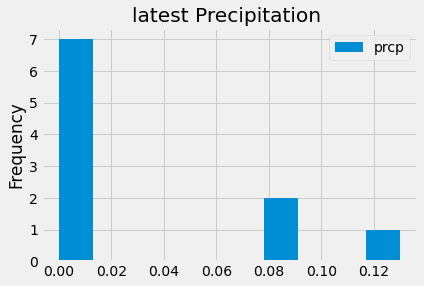

In [37]:
results_df.plot.hist(title="latest Precipitation ")
plt.show()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,prcp
count,10.000000
mean,0.030000
std,0.048074
min,0.000000
25%,0.000000
50%,0.000000
75%,0.062500
max,0.130000


# Exploratory Station Analysis

In [ ]:
Station = Base.classes.station
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).group_by(Station.station).count()
print(stations)

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
results = (
    session
    .query(Measurement.station,func.count(Measurement.station))
    #.func.count(Measurement.station)
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())

    .all()
    
)
results


In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
most_active=(session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))
.filter(Measurement.station=='USC00519281')
.all()
)
most_active

[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results1 = (
    session
    .query(Measurement.date,Measurement.prcp)
    .filter(Measurement.date > year_ago_date)
    .filter(Measurement.station=='USC00519281')
    
    .all()
)


In [29]:
results1_df=pd.DataFrame(results1, columns=['Measurement.date','Measurement.tobs'])
results1_df.head()

,Measurement.date,Measurement.tobs
0,2016-08-24,2.15
1,2016-08-25,0.06
2,2016-08-26,0.01
3,2016-08-27,0.12
4,2016-08-28,0.60


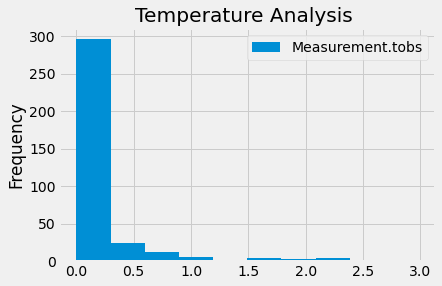

In [32]:
results1_df.plot.hist(title="Temperature Analysis ")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()